In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dixit066","key":"1a97d7c958cfe851290b5e0bf103919c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mattcarter865/mines-vs-rocks

  0% 0.00/29.1k [00:00<?, ?B/s]
100% 29.1k/29.1k [00:00<00:00, 11.2MB/s]


In [ ]:
from zipfile import ZipFile
filename= "mines-vs-rocks.zip"
with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd 
import numpy as np
from  sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
file=pd.read_csv("/content/sonar.all-data.csv")
file.iloc[:,0:60]

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.

In [ ]:
y_tr=[]
y_t=file.iloc[:,60]
y_t=np.asarray(y_t)
for i in range(len(y_t)):
  if y_t[i]=="R":
    y_tr.append("0")
  else:
    y_tr.append("1")


In [ ]:
y_tr=shuffle(y_tr,random_state=1)

In [ ]:
y_tri,y_tesi=train_test_split(y_tr,test_size=0.20,random_state=415)
y_tri=np.asarray(y_tri)
y_tesi=np.asarray(y_tesi)


(42,)

In [ ]:
def read_dataset():
  file=pd.read_csv("/content/sonar.all-data.csv")
  y=file.iloc[:,60]
  X=file.iloc[:,0:60]

  encoder=LabelEncoder()
  encoder.fit(y)
  y=encoder.transform(y)
  Y=one_hot_encode(y)
  print(X.shape)
  return X,Y


def one_hot_encode(labels):
  n_labels=len(labels)
  n_unique_labels=len(np.unique(labels))
  one_hot_encode=np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels),labels]=1
  return one_hot_encode



In [ ]:
X,Y=read_dataset()


(207, 60)


In [ ]:
X,Y=shuffle(X,Y,random_state=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=415)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(165, 60)
(165, 2)
(42, 60)
(42, 2)


In [ ]:
learning_rate=0.3
training_epochs=1000
cost_history=np.empty(shape=[1],dtype=float)
n_dim=X.shape[1]
print(n_dim)
n_classes=2
model_path="/content/sample_data"


60


In [ ]:
n_hidden1=60
n_hidden2=60
n_hidden3=60
n_hidden4=60


In [ ]:
x=tf.placeholder(tf.float32,[None,n_dim])
W=tf.Variable(tf.zeros([n_dim,n_classes]))
b=tf.Variable(tf.zeros([n_classes]))
y_=tf.placeholder(tf.float32,[None,n_classes])

In [ ]:
def multilayer_precpetron(x,wieghts,baises):
  layer_1=tf.add(tf.matmul(x,wieghts["w1"]),baises["b1"])
  layer_1=tf.nn.sigmoid(layer_1)
  layer_2=tf.add(tf.matmul(layer_1,wieghts["w2"]),baises["b2"])
  layer_2=tf.nn.sigmoid(layer_2)
  layer_3=tf.add(tf.matmul(layer_2,wieghts["w3"]),baises["b3"])
  layer_3=tf.nn.sigmoid(layer_3)
  layer_4=tf.add(tf.matmul(layer_3,wieghts["w4"]),baises["b4"])
  layer_4=tf.nn.relu(layer_4)
  out_layer=(tf.add(tf.matmul(layer_4,wieghts["out"]),baises["out"]))
  return out_layer

In [ ]:
wieghts={"w1":tf.Variable(tf.truncated_normal([n_dim,n_hidden1])),
         "w2":tf.Variable(tf.truncated_normal([n_hidden1,n_hidden2])),
         "w3":tf.Variable(tf.truncated_normal([n_hidden2,n_hidden3])),
         "w4":tf.Variable(tf.truncated_normal([n_hidden3,n_hidden4])),

         "out":tf.Variable(tf.truncated_normal([n_hidden4,n_classes]))}

In [ ]:
baises={"b1":tf.Variable(tf.truncated_normal([n_hidden1])),
        "b2":tf.Variable(tf.truncated_normal([n_hidden2])),
        "b3":tf.Variable(tf.truncated_normal([n_hidden3])),
        "b4":tf.Variable(tf.truncated_normal([n_hidden4])),
        "out":tf.Variable(tf.truncated_normal([n_classes]))}

In [ ]:
multilayer_precpetron(x,wieghts,baises)

<tf.Tensor 'Add_4:0' shape=(?, 2) dtype=float32>

In [ ]:
init=tf.global_variables_initializer()

In [ ]:
y=multilayer_precpetron(x,wieghts,baises)
print(y)
print(y_)

Tensor("Add_9:0", shape=(?, 2), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 2), dtype=float32)


In [ ]:
cost_function=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y,labels=y_))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [ ]:
sess=tf.Session()
sess.run(init)

In [ ]:
mse_history=[]
accuracy_history=[]

In [ ]:
for epochs in range(training_epochs):
  sess.run(training_step, feed_dict={x:X_train, y_:Y_train})
  cost = sess.run(cost_function,feed_dict={x:X_train, y_:Y_train})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax((y),1),tf.argmax((y_),1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  #print("Accuracy: ", (sess.run(accuracy, feed_dict={x:X_test, y_:Y_test})))
  pred_y = sess.run(y,feed_dict={x:X_test} )
  mse = tf.reduce_mean(tf.square(pred_y - Y_test))
  mse_ = sess.run(mse)
  mse_history.append(mse_)

  accuracy = (sess.run(accuracy,feed_dict={x:X_train, y_:Y_train}))
  accuracy_history.append(accuracy)
  print('epoch: ', epochs,' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

epoch:  0  -  cost:  0.23328923  - MSE:  11.157315867836974 - Train Accuracy:  0.92121214
epoch:  1  -  cost:  0.23423843  - MSE:  10.696907435870386 - Train Accuracy:  0.90909094
epoch:  2  -  cost:  0.2404449  - MSE:  11.001703812955137 - Train Accuracy:  0.8848485
epoch:  3  -  cost:  0.23596957  - MSE:  10.932904975059458 - Train Accuracy:  0.90909094
epoch:  4  -  cost:  0.25844106  - MSE:  11.042656829347091 - Train Accuracy:  0.8606061
epoch:  5  -  cost:  0.26705515  - MSE:  9.957713530787348 - Train Accuracy:  0.8727273
epoch:  6  -  cost:  0.25119078  - MSE:  11.209442692192987 - Train Accuracy:  0.8666667
epoch:  7  -  cost:  0.26505995  - MSE:  11.637660669824605 - Train Accuracy:  0.8787879
epoch:  8  -  cost:  0.30859607  - MSE:  11.312675837431183 - Train Accuracy:  0.8242424
epoch:  9  -  cost:  0.35279727  - MSE:  10.129336921114506 - Train Accuracy:  0.8121212
epoch:  10  -  cost:  0.27317336  - MSE:  10.23392416485279 - Train Accuracy:  0.8363636
epoch:  11  -  cost:

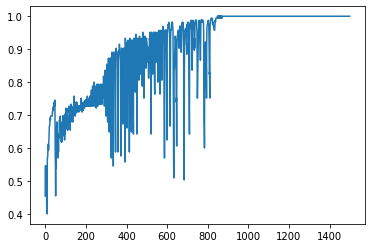

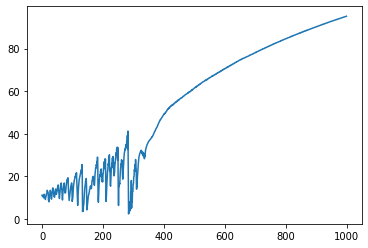

In [ ]:
#Plot MSE and accuracy graph
import matplotlib.pyplot as plt

plt.plot(accuracy_history)
plt.show()
plt.plot(mse_history)
plt.show()
 
#Print the final mean square error
#correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
#accuracy = tf.reduce_mean(tf.square(pred_y - test_y))
#print("Test Accuracy: ", (sess.run(y, feed_dict={x:test_x, y_:test_y} )))
#Print the final mean square error
#pred_y = sess.run(y, feed_dict={x:test_x})
#mse = tf.reduce_mean(tf.square(pred_y- test_y))
#print("MSE: %.4f" % sess.run(mse))


In [ ]:
mena_acc=np.mean(accuracy_history)
print(mena_acc)
mean_mse=np.mean(mse_history)
print(mean_mse)

0.9004323
54.498492382634836


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_tri)
Y_pred_svm = classifier.predict(X_test)
Y_pred_svm=Y_pred_svm.astype(float)
y_tesi=y_tesi.astype(float)
error = np.subtract(y_tesi, Y_pred_svm)

error = np.mean(np.abs(error))
accuracy = (1 - error) * 100

print(" Accuracy_svm"  + str(round(accuracy,2)) + "%")

 Accuracy_svm88.1%


In [ ]:
saver = tf.train.Saver()
save_path = saver.save(sess, model_path)
print("Model saved in file: %s", save_path)

Model saved in file: %s /content/sample_data


In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)
model_path = "/content/sample_data"
saver.restore(sess, model_path)

prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("**************************************************************")
print("* 1 stands for M, (i.e. Mine) and 0 stands for R (i.e. Rock) *")
print("**************************************************************")
for i in range(93,101):
    prediction_run = sess.run(prediction, feed_dict={x:X[i].reshape(1,60)})
    accuracy_run = sess.run(accuracy, feed_dict={x:X[i].reshape(1,60), y_:Y[i].reshape(1,2)})
    print(i,"Original Class: ", int(sess.run(y_[i][1],feed_dict={y_:Y})), " Predicted Values: ", prediction_run[0] )
    print("Accuracy: ",str(accuracy_run*100)+"%")

INFO:tensorflow:Restoring parameters from /content/sample_data
**************************************************************
* 1 stands for M, (i.e. Mine) and 0 stands for R (i.e. Rock) *
**************************************************************


KeyError: ignored

In [ ]:
W=tf.Variable([0.3],tf.float32)
b=tf.Variable([-0.3],tf.float32)
x=tf.placeholder(tf.float32)
linear_model=W*x+b
y=tf.placeholder(tf.float32)
square_de=tf.square(linear_model-y)
error=tf.reduce_sum(square_de)
optimize=tf.train.GradientDescentOptimizer(0.01)
train=optimize.minimize(error)
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
for i in range(1000):
  (sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]}))
print(sess.run([W,b]))